In [29]:
import os
import json
import matplotlib.pyplot as plt

In [36]:
# Visualize last run
# Get model output directory
model_out_dir = '../model_out'

# Check that it exists
assert os.path.exists(model_out_dir), f"ERROR: {model_out_dir} does not exist."

# Get all dirs
runs_dirs = os.listdir(model_out_dir)
# Find latest run dir
run_dir = sorted([run_dir for run_dir in runs_dirs if run_dir.startswith('2025')])
# Check there is a run dir
assert len(run_dir) > 0, "ERROR: No run directory found"

last_run_dir = run_dir[-1]
last_run_dir_path = os.path.join(model_out_dir, last_run_dir)

# Find associated params file
params_path = os.path.join(model_out_dir, last_run_dir, 'hyperparameters.txt')

with open(params_path, 'r') as f:
    params_string = f.read()
    # Convert to prettified printable version
    params = json.loads(params_string)

# Check there are params files
assert len(params) > 0, "ERROR: No params files found"

k_losses = {k: [] for k in range(5)}
for k in range(5):
    print(f'proccessig {k}')
    # Make sure the files match
    # k run losses path
    k_run_losses_path = os.path.join(last_run_dir_path, f'k_{k}_losses.csv')
    assert os.path.exists(k_run_losses_path)

    # Open and read in
    with open(k_run_losses_path, 'r') as f:
        losses_string = f.read()
        k_losses_per_epoch = [epoch_losses for epoch_losses in losses_string.split('\n')]
        # Convert to form ingestible by matplotlib
        for epoch_losses in k_losses_per_epoch:
            k_losses[k].extend([float(loss) for loss in epoch_losses.split(',')])


proccessig 0
proccessig 1
proccessig 2
proccessig 3
proccessig 4


In [37]:
# Output hyperparameters
params

{'batch_size': 8,
 'accumulation_steps': 4,
 'chunk_size': 512,
 'margin': 0.5,
 'epsilon': 1e-06,
 'num_pairs': 1024,
 'num_splits': 5,
 'num_epochs': 3}

In [38]:
print(k_losses[0])

[0.1380642056465149, 0.14450179040431976, 0.11471172422170639, 0.06105943024158478, 0.09982041269540787, 0.14514707028865814, 0.17511433362960815, 0.12557047605514526, 0.0770033597946167, 0.10233519226312637, 0.07678914070129395, 0.09498761594295502, 0.09618702530860901, 0.03544091433286667, 0.10509006679058075, 0.060036104172468185, 0.18213436007499695, 0.07592921704053879, 0.058995336294174194, 0.10629869252443314, 0.06640762090682983, 0.045035067945718765, 0.051602914929389954, 0.1489206999540329, 0.07344628870487213, 0.02872001752257347, 0.075685054063797, 0.10001634806394577, 0.08190824836492538, 0.07155269384384155, 0.05855325236916542, 0.043059200048446655, 0.08144641667604446, 0.08518598228693008, 0.03000730834901333, 0.08978284895420074, 0.06173185259103775, 0.011728987097740173, 0.05893099308013916, 0.04119992256164551, 0.1647997796535492, 0.1346004158258438, 0.0482039675116539, 0.08268338441848755, 0.034598458558321, 0.0717577189207077, 0.0705348402261734, 0.0778606235980987

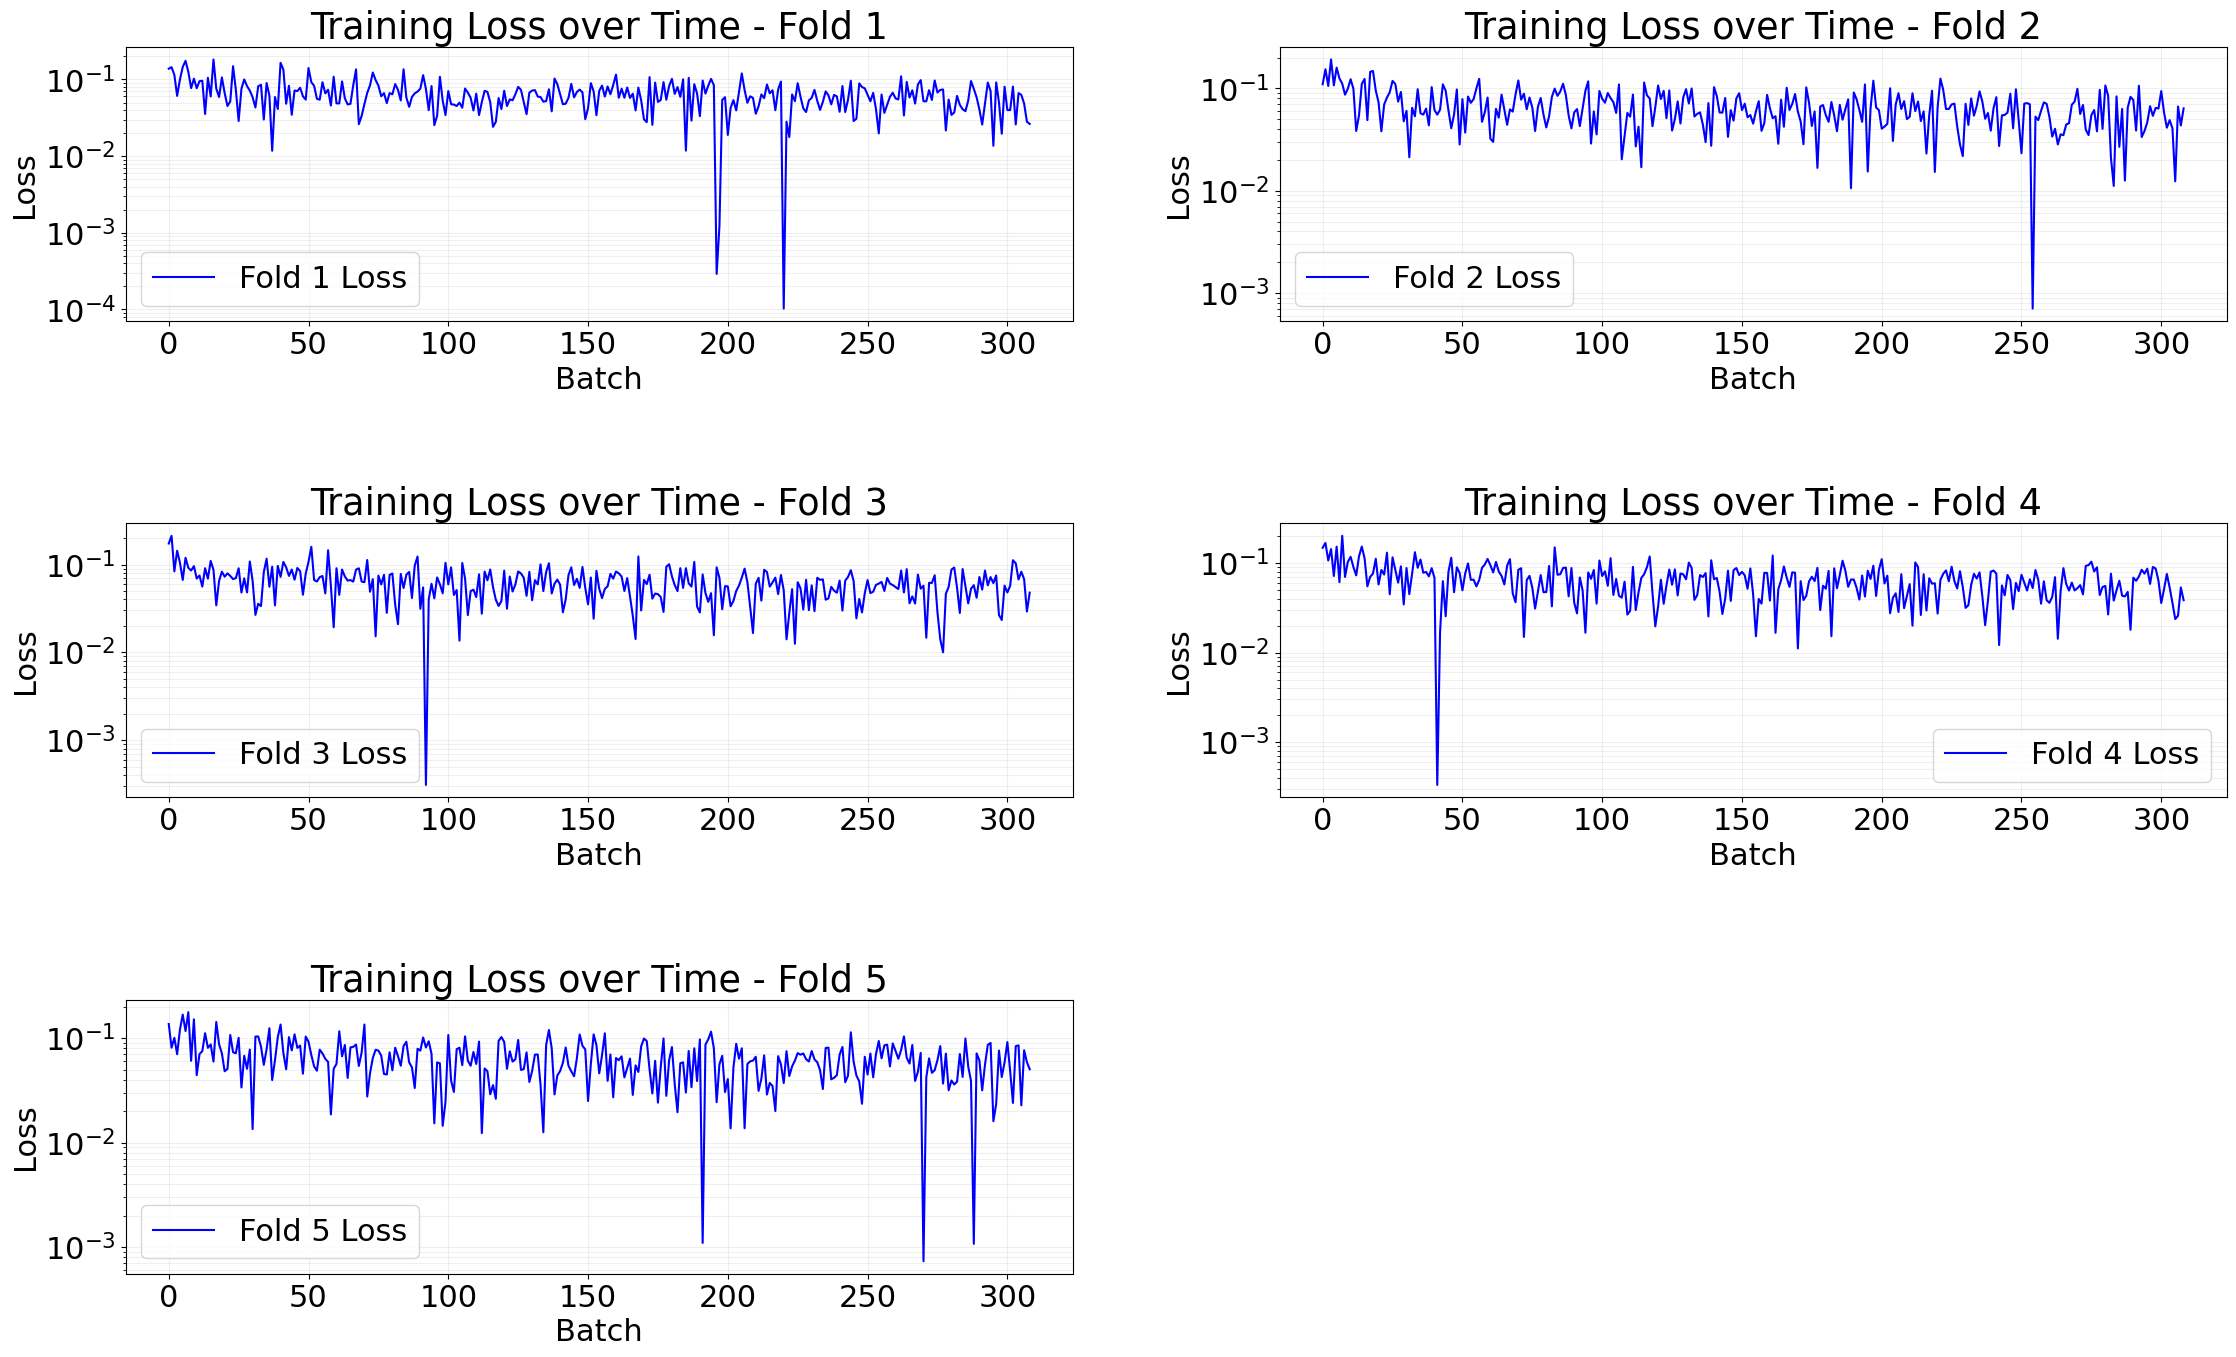

In [44]:
plt.rcParams.update({'font.size': 22})

# Create one figure with 5 subplots arranged vertically
plt.figure(figsize=(24, 24))

for k in range(5):
    # Create subplot in position k+1
    plt.subplot(5, 2, k+1)
    
    # Plot the loss for this fold
    plt.plot(k_losses[k], 'b-', label=f'Fold {k+1} Loss')
    
    # Add grid and labels
    plt.grid(True)
    plt.xlabel('Batch')
    plt.ylabel('Loss')
    plt.title(f'Training Loss over Time - Fold {k+1}')
    plt.legend()
    
    # Set log scale and adjust grid
    plt.yscale('log')
    plt.grid(True, which="both", ls="-", alpha=0.2)

# Adjust layout to prevent overlap
plt.tight_layout(pad=3.0)
plt.show()